# Identification of Fake New using Ensemble Methods
### Jeffrey Lin Alex Te
#### Santa Clara University
#### COEN281 Term Project 

In [1]:
#libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import re

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

### Dataset
Here we will inport a dataset taken from: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [2]:
# Importing fake news dataset
df_false = pd.read_csv("Fake.csv")
df_false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [3]:
# Importing true news dataset
df_true = pd.read_csv("True.csv")
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

### Data Clean

In [4]:
# remove brackets since true dataset has random brackets with the time in it 
# remove entries with empty features
# remove publisher identification (reuters)
# tbd

del df_true['subject']
del df_true['date']
del df_false['subject']
del df_false['date']

for index, row in df_true.iterrows():
    row_text = row['text']
    if ") - " in row_text:
        row_text = row_text.split(") - ")[1]
        
    if bool(re.search('\[\d* \w*\]', row_text)):
        row_text = " ".join(re.split('\[\d* \w*\]', row_text))
        
    row['text'] = row_text

df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text  
0  The head of a conservative Republican faction ...  
1  Transgender people will be allowed for the fir...  
2  The special counsel investigation of links bet...  
3  Trump campaign adviser George Papadopoulos tol...  
4  President Donald Trump called on the U.S. Post...

### Combining the data

In [5]:
#creating labels for true(1)/false(0)
df_true['category'] = 1
df_false['category'] = 0

In [6]:
#concat datasets into one
df = pd.concat([df_true,df_false]) 

In [7]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  category  
0      The head of a conservative Republican faction ...         1  
1      Transgender people will be allowed for the fir...         1  
2      The special counsel investigation of links bet...         1  
3      Trump campaign adviser George Papadopoulos tol...         1  
4      President Donald Trump called on the U.S. Post...         1  
...                                                  ...       ...  
23476  21st Century Wire says As 21WIRE reported earl...         0  
23477  21st Century Wire says It s a familiar theme. ...         0  
23478  Patrick Henningsen  21st Century WireRemember ...         0  
23479  21st Century Wire says Al Jazeera America will...         0  
23480  21st Century Wire says As 21WIRE predicted in ...         0  

[44898 rows x 3 columns]

In [8]:
# dataset balance
df.category.value_counts()

0    23481
1    21417
Name: category, dtype: int64

<AxesSubplot:>

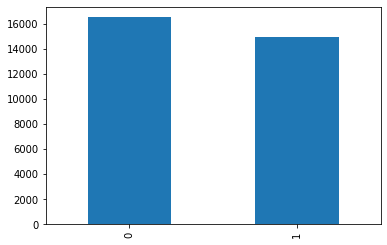

In [9]:
#we are splitting the training and testing dataset here since if we do it later we get a memory error
y = df["category"] 
X = df["text"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pd.Series(y_train).value_counts().plot.bar()

In [10]:
df_xtrain = pd.DataFrame(X_train)
df_xtrain.head()

text
21175  We can t afford to give our US Veterans a prop...
18335  Mubashra Uddin, a 20-year-old Muslim college s...
4685   Donald Trump has lied about how and why he rec...
15574  A former lawmaker filed a petition at Kenya s ...
22070  Patrick Henningsen 21st Century WireDespite re...

In [11]:
df_xtest = pd.DataFrame(X_test)
df_xtest.head()

text
8021   If you missed it in all the kerfluffle over th...
7097   Some of Donald Trump’s strongest conservative ...
11024  State police are searching for fugitive accuse...
2052   U.S. President Donald Trump hinted on Tuesday ...
7087   Greek Prime Minister Alexis Tsipras spoke by t...

### Data Analysis

In [12]:
#insert analysis here
# point of question


### NLP Data Preparation

In [13]:
# remove puncutation from text
def clean_punc(inputString):
    cleaned = re.sub(r'[?|!|\'|#]', r'', inputString)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

In [14]:
df_xtrain = df.apply(lambda row: clean_punc(row["text"]), axis=1)
df_xtest = df.apply(lambda row: clean_punc(row["text"]), axis=1)

#df["text"] = df.apply(lambda row: clean_punc(row["text"]), axis=1)

In [15]:
# lowercase
def lower_case(inputString):
    return inputString.lower()

In [16]:
df_xtrain = df.apply(lambda row: lower_case(row["text"]), axis=1)
df_xtest = df.apply(lambda row: lower_case(row["text"]), axis=1)

#df["text"] = df.apply(lambda row: lower_case(row["text"]), axis=1)

In [17]:
#use this to download wordnet library (one time download)
"""
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
"""

"\nimport nltk\nimport ssl\n\ntry:\n    _create_unverified_https_context = ssl._create_unverified_context\nexcept AttributeError:\n    pass\nelse:\n    ssl._create_default_https_context = _create_unverified_https_context\n\nnltk.download('wordnet')\n"

In [18]:
# lemmatization groups words with the same base meaning together
# i.e. studies studying cries cry -> study studying cry cry
def lemmatization(inputString):
    lemmatizer = WordNetLemmatizer()
    words = []
    for word in inputString.split():
        words.append(lemmatizer.lemmatize(word))
    output = " ".join(words)
    return output

# test
#print(lemmatization("studies studying cries cry"))

In [19]:
# apply lemmatization to text
df_xtrain = df.apply(lambda row: lemmatization(row["text"]), axis=1)
df_xtest = df.apply(lambda row: lemmatization(row["text"]), axis=1)

#df["text"] = df.apply(lambda row: lemmatization(row["text"]), axis=1)

In [20]:
# remove stop words that don't provide additional meaning to text
def stopword_removal(inputString):
    sw = stopwords.words('english')
    words = [word for word in inputString.split() if word not in sw]
    output = " ".join(words)
    return output

In [21]:
# apply stopword removal to text
df_xtrain = df.apply(lambda row: stopword_removal(row["text"]), axis=1)
df_xtest = df.apply(lambda row: stopword_removal(row["text"]), axis=1)

#df["text"] = df.apply(lambda row: stopword_removal(row["text"]), axis=1)

In [22]:
df_xtrain.head()

0    The head conservative Republican faction U.S. ...
1    Transgender people allowed first time enlist U...
2    The special counsel investigation links Russia...
3    Trump campaign adviser George Papadopoulos tol...
4    President Donald Trump called U.S. Postal Serv...
dtype: object

In [23]:
df_xtest.head()

0    The head conservative Republican faction U.S. ...
1    Transgender people allowed first time enlist U...
2    The special counsel investigation links Russia...
3    Trump campaign adviser George Papadopoulos tol...
4    President Donald Trump called U.S. Postal Serv...
dtype: object

In [24]:
# tfidf vectorizer

tfidf = TfidfVectorizer()
output_train = tfidf.fit_transform(df_xtrain)
df_xtrainvectorized = pd.DataFrame(output_train.toarray(), columns=tfidf.get_feature_names())
df_xtrainvectorized

00       000  0000  00000017  00004  000048  000063  00007  000270  \
0      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
1      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
2      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
3      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
4      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
...    ...       ...   ...       ...    ...     ...     ...    ...     ...   
44893  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44894  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44895  0.0  0.012019   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44896  0.0  0.023153   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44897  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   

       00042  ...  zzpx_bzka40police  zzqvyk8xif  zzsg90pbf6  zztaine  \
0        0.0  ...                0.0         0.0         0.0      0.0   
1        0.0  ...                0.0         0.0         0.0      0.0   
2        0.0  ...                0.0         0.0         0.0      0.0   
3        0.0  ...                0.0         0.0         0.0      0.0   
4        0.0  ...                0.0         0.0         0.0      0.0   
...      ...  ...                ...         ...         ...      ...   
44893    0.0  ...                0.0         0.0         0.0      0.0   
44894    0.0  ...                0.0         0.0         0.0      0.0   
44895    0.0  ...                0.0         0.0         0.0      0.0   
44896    0.0  ...                0.0         0.0         0.0      0.0   
44897    0.0  ...                0.0         0.0         0.0      0.0   

       zzucqevt3m  zzuml4hkoc  zzzzaaaacccchhh  zzzzzzzz  zzzzzzzzzzzzz  \
0             0.0         0.0              0.0       0.0            0.0   
1             0.0         0.0              0.0       0.0            0.0   
2             0.0         0.0              0.0       0.0            0.0   
3             0.0         0.0              0.0       0.0            0.0   
4             0.0         0.0              0.0       0.0            0.0   
...           ...         ...              ...       ...            ...   
44893         0.0         0.0              0.0       0.0            0.0   
44894         0.0         0.0              0.0       0.0            0.0   
44895         0.0         0.0              0.0       0.0            0.0   
44896         0.0         0.0              0.0       0.0            0.0   
44897         0.0         0.0              0.0       0.0            0.0   

       émigré  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
44893     0.0  
44894     0.0  
44895     0.0  
44896     0.0  
44897     0.0  

[44898 rows x 121541 columns]

In [25]:
output_test = tfidf.fit_transform(df_xtest)
df_xtest_vectorized = pd.DataFrame(output_test.toarray(), columns=tfidf.get_feature_names())
df_xtest_vectorized

00       000  0000  00000017  00004  000048  000063  00007  000270  \
0      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
1      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
2      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
3      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
4      0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
...    ...       ...   ...       ...    ...     ...     ...    ...     ...   
44893  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44894  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44895  0.0  0.012019   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44896  0.0  0.023153   0.0       0.0    0.0     0.0     0.0    0.0     0.0   
44897  0.0  0.000000   0.0       0.0    0.0     0.0     0.0    0.0     0.0   

       00042  ...  zzpx_bzka40police  zzqvyk8xif  zzsg90pbf6  zztaine  \
0        0.0  ...                0.0         0.0         0.0      0.0   
1        0.0  ...                0.0         0.0         0.0      0.0   
2        0.0  ...                0.0         0.0         0.0      0.0   
3        0.0  ...                0.0         0.0         0.0      0.0   
4        0.0  ...                0.0         0.0         0.0      0.0   
...      ...  ...                ...         ...         ...      ...   
44893    0.0  ...                0.0         0.0         0.0      0.0   
44894    0.0  ...                0.0         0.0         0.0      0.0   
44895    0.0  ...                0.0         0.0         0.0      0.0   
44896    0.0  ...                0.0         0.0         0.0      0.0   
44897    0.0  ...                0.0         0.0         0.0      0.0   

       zzucqevt3m  zzuml4hkoc  zzzzaaaacccchhh  zzzzzzzz  zzzzzzzzzzzzz  \
0             0.0         0.0              0.0       0.0            0.0   
1             0.0         0.0              0.0       0.0            0.0   
2             0.0         0.0              0.0       0.0            0.0   
3             0.0         0.0              0.0       0.0            0.0   
4             0.0         0.0              0.0       0.0            0.0   
...           ...         ...              ...       ...            ...   
44893         0.0         0.0              0.0       0.0            0.0   
44894         0.0         0.0              0.0       0.0            0.0   
44895         0.0         0.0              0.0       0.0            0.0   
44896         0.0         0.0              0.0       0.0            0.0   
44897         0.0         0.0              0.0       0.0            0.0   

       émigré  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
44893     0.0  
44894     0.0  
44895     0.0  
44896     0.0  
44897     0.0  

[44898 rows x 121541 columns]

In [26]:
#note: there is a lot of garbage values

tfidf.get_feature_names()

['00',
 '000',
 '0000',
 '00000017',
 '00004',
 '000048',
 '000063',
 '00007',
 '000270',
 '00042',
 '0009',
 '000938',
 '000a',
 '000after',
 '000although',
 '000american',
 '000california',
 '000cases',
 '000cylvia',
 '000dillon000',
 '000ecuador',
 '000florida',
 '000georgia',
 '000have',
 '000illegal',
 '000illinois',
 '000in',
 '000jose',
 '000kyrgyzstan',
 '000m',
 '000michigan',
 '000new',
 '000oman',
 '000s',
 '000saudi',
 '000south',
 '000th',
 '000that',
 '000the',
 '000uterine',
 '001',
 '00106',
 '0011',
 '00155',
 '0018',
 '00193',
 '001romney',
 '001st',
 '002',
 '0020',
 '00220',
 '00240',
 '002singapore',
 '003',
 '004',
 '00458',
 '004saint',
 '005',
 '0050',
 '005380',
 '005930',
 '006',
 '00654',
 '00684',
 '007',
 '0075',
 '0076',
 '007kzman',
 '008',
 '00867',
 '009',
 '00am',
 '00c6j7capuhttps',
 '00hex',
 '00o',
 '00pm',
 '00pme',
 '00yecahb4d',
 '01',
 '010',
 '0100',
 '01000110',
 '01010101',
 '011',
 '012',
 '01233',
 '013',
 '0130',
 '014',
 '01494',
 '015',


In [27]:
#test countvectorizer
"""
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
output = count_vectorizer.fit_transform(df["text"])
df_countvectorized = pd.DataFrame(output.toarray(), columns=tfidf.get_feature_names())
df_countvectorized
"""

ValueError: Shape of passed values is (44898, 121543), indices imply (44898, 121541)